In [1]:
import pandas as pd

df_data = pd.read_csv('messidor_features.arff', header=None, comment='@')
headers =['Quality Assessment', 'Pre-Screening', 'MA Detection 1', 'MA Detection 2', 'MA Detection 3', 'MA Detection 4', 
          'MA Detection 5', 'MA Detection 6', 'Exudates Detection 1', 'Exudates Detection 2', 'Exudates Detection 3', 
          'Exudates Detection 4', 'Exudates Detection 5', 'Exudates Detection 6', 'Exudates Detection 7', 
          'Exudates Detection 8', 'Euclidean Distance', 'Optic Disc Diameter', 'AM/FM', 'Output']
df_data.to_csv('messidor_features.csv', header=headers, index=False)
df = pd.read_csv('messidor_features.csv')
df

,Quality Assessment,Pre-Screening,MA Detection 1,MA Detection 2,MA Detection 3,MA Detection 4,MA Detection 5,MA Detection 6,Exudates Detection 1,Exudates Detection 2,Exudates Detection 3,Exudates Detection 4,Exudates Detection 5,Exudates Detection 6,Exudates Detection 7,Exudates Detection 8,Euclidean Distance,Optic Disc Diameter,AM/FM,Output
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [2]:
output_df = df['Output']
df.drop('Output', axis=1, inplace=True)
output_df

0       0
1       0
2       1
3       0
4       1
       ..
1146    0
1147    0
1148    0
1149    1
1150    0
Name: Output, Length: 1151, dtype: int64

In [3]:
for column in df.iloc[:, 2:-1].columns:
    amountOfNullValues = (df[column] == 0).sum()
    print("Null Values -", column, "-", amountOfNullValues)
    
    if amountOfNullValues > 1151 * 0.2:
        df.drop(columns=[column], inplace=True)
    elif amountOfNullValues != 0:
        average = df[df[column] != 0][column]
        average_value = average.mean()
        print("Average Calculated Value -", column, "-", average_value)
        df.loc[df[column] == 0, column] = average_value

Null Values - MA Detection 1 - 0
Null Values - MA Detection 2 - 0
Null Values - MA Detection 3 - 0
Null Values - MA Detection 4 - 0
Null Values - MA Detection 5 - 0
Null Values - MA Detection 6 - 0
Null Values - Exudates Detection 1 - 0
Null Values - Exudates Detection 2 - 1
Average Calculated Value - Exudates Detection 2 - 23.10808902173913
Null Values - Exudates Detection 3 - 12
Average Calculated Value - Exudates Detection 3 - 8.796318235294118
Null Values - Exudates Detection 4 - 111
Average Calculated Value - Exudates Detection 4 - 2.0324989884615396
Null Values - Exudates Detection 5 - 333
Null Values - Exudates Detection 6 - 536
Null Values - Exudates Detection 7 - 697
Null Values - Exudates Detection 8 - 767
Null Values - Euclidean Distance - 0
Null Values - Optic Disc Diameter - 0


In [4]:
df

,Quality Assessment,Pre-Screening,MA Detection 1,MA Detection 2,MA Detection 3,MA Detection 4,MA Detection 5,MA Detection 6,Exudates Detection 1,Exudates Detection 2,Exudates Detection 3,Exudates Detection 4,Euclidean Distance,Optic Disc Diameter,AM/FM
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.486903,0.100025,1
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.520908,0.144414,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,0.530904,0.128548,0
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.483284,0.114790,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,2.032499,0.475935,0.123572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.537470,0.116795,0
1147,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.516733,0.124190,0
1148,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.560632,0.129843,0
1149,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.485972,0.106690,1


In [5]:
import numpy as np

minimum_value = np.min(df)
maximum_value = np.max(df)
normalized_df = (df - minimum_value) / (maximum_value - minimum_value)
normalized_df

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Quality Assessment,Pre-Screening,MA Detection 1,MA Detection 2,MA Detection 3,MA Detection 4,MA Detection 5,MA Detection 6,Exudates Detection 1,Exudates Detection 2,Exudates Detection 3,Exudates Detection 4,Euclidean Distance,Optic Disc Diameter,AM/FM
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106351,0.049679,0.012896,0.530801,0.261133,1.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142395,0.031337,0.003902,0.682302,0.536341,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167489,0.119601,0.081172,0.726836,0.437973,0.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110360,0.085957,0.051509,0.514678,0.352675,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051272,0.003855,0.033991,0.481936,0.407122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.014179,0.005600,0.000279,0.000035,0.756089,0.365106,0.0
1147,1.0,1.0,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.155722,0.163801,0.076047,0.016373,0.663701,0.410954,0.0
1148,1.0,0.0,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.074612,0.083560,0.016610,0.002290,0.859281,0.446002,0.0
1149,1.0,1.0,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.099548,0.075411,0.044682,0.018013,0.526653,0.302456,1.0


In [6]:
number_rows = int(len(normalized_df) * 0.8)
calculated_chosen_data = normalized_df.sample(n=number_rows, random_state=42)
unchosen_data = normalized_df.drop(calculated_chosen_data.index)

calculated_chosen_data
unchosen_data

,Quality Assessment,Pre-Screening,MA Detection 1,MA Detection 2,MA Detection 3,MA Detection 4,MA Detection 5,MA Detection 6,Exudates Detection 1,Exudates Detection 2,Exudates Detection 3,Exudates Detection 4,Euclidean Distance,Optic Disc Diameter,AM/FM
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142395,0.031337,0.003902,0.682302,0.536341,0.0
13,1.0,1.0,0.313333,0.320611,0.319328,0.298077,0.270833,0.193182,0.056155,0.040304,0.022649,0.003149,0.596075,0.498354,1.0
14,1.0,1.0,0.620000,0.702290,0.764706,0.846154,0.885417,0.863636,0.020470,0.011846,0.003768,0.001089,0.773050,0.412907,0.0
20,1.0,1.0,0.240000,0.274809,0.302521,0.317308,0.312500,0.250000,0.151164,0.210401,0.076484,0.020143,0.491978,0.327894,0.0
21,1.0,1.0,0.120000,0.122137,0.117647,0.105769,0.114583,0.068182,0.444398,0.207483,0.122727,0.017471,0.457388,0.223866,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1.0,1.0,0.506667,0.534351,0.571429,0.576923,0.395833,0.272727,0.395341,0.562619,0.398130,0.277105,0.725246,0.428413,1.0
1135,1.0,1.0,0.100000,0.114504,0.126050,0.144231,0.145833,0.090909,0.451105,0.310229,0.181248,0.055254,0.653761,0.285976,1.0
1141,1.0,1.0,0.346667,0.396947,0.428571,0.480769,0.520833,0.454545,0.020523,0.023041,0.003606,0.004841,0.816426,0.182940,1.0
1143,1.0,1.0,0.073333,0.083969,0.075630,0.076923,0.062500,0.056818,0.601396,0.159450,0.129457,0.001649,0.826375,0.161917,1.0


In [7]:
x_training = calculated_chosen_data.values
x_testing = unchosen_data.values
y_training = output_df.loc[calculated_chosen_data.index].values
y_testing = output_df.loc[unchosen_data.index].values

In [8]:
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(data, x, y, hidden=12, lr=0.1, epochs=10000):
        data.x = x
        data.y = y
        data.hidden = hidden
        data.lr = lr
        data.epochs = epochs
        data.input = x.shape[1]
        data.output = y.shape[1]
        data.W1 = np.random.randn(data.input, data.hidden)
        data.W2 = np.random.randn(data.hidden, data.output)
        data.b1 = np.zeros((1, data.hidden))
        data.b2 = np.zeros((1, data.output))

    def sigmoid(data, a):
        return 1 / (1 + np.exp(-a))

    def sigmoid_derivative(data, a):
        return a * (1 - a)

    def softmax(data, a):
        exp_x = np.exp(a)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward_propagation(data, x):
        data.z1 = np.dot(x, data.W1) + data.b1
        data.a1 = data.sigmoid(data.z1)
        data.z2 = np.dot(data.a1, data.W2) + data.b2
        data.a2 = data.softmax(data.z2)
        return data.a2

    def back_propagation(data, x, y, y_pred):
        m = y.shape[0]
        dL_wrt_dz2 = y_pred - y
        dL_wrt_dW2 = (1 / m) * np.dot(data.a1.T, dL_wrt_dz2)
        dL_wrt_db2 = (1 / m) * np.sum(dL_wrt_dz2, axis=0, keepdims=True)
        dL_wrt_da1 = np.dot(dL_wrt_dz2, data.W2.T)
        dL_wrt_dz1 = dL_wrt_da1 * data.sigmoid_derivative(data.a1)
        dL_wrt_dW1 = (1 / m) * np.dot(x.T, dL_wrt_dz1)
        dL_wrt_db1 = (1 / m) * np.sum(dL_wrt_dz1, axis=0)

        data.W1 -= data.lr * dL_wrt_dW1
        data.b1 -= data.lr * dL_wrt_db1
        data.W2 -= data.lr * dL_wrt_dW2
        data.b2 -= data.lr * dL_wrt_db2

    def train(data):
        mse = []
        epochs_number = 0
        for i in range(data.epochs):
            y_pred = data.forward_propagation(data.x)
            epoch_mse = ((data.y - y_pred) ** 2).mean()
            mse.append(epoch_mse)
            epochs_number += 1
            data.back_propagation(data.x, data.y, y_pred)

            epochs_loss = np.mean(-data.y * np.log(y_pred))
            if (i + 1) % 1 == 0:
                print(f'Epoch Attempt - {i + 1}/{data.epochs} Loss - {epochs_loss:.4f}')

        plt.plot(range(epochs_number), mse)
        plt.xlabel('Epoch Attempt')
        plt.ylabel('MSE Number')
        plt.show()

    def predict(data, x):
        y_pred = data.forward_propagation(x)
        if y_pred.ndim == 1:
            return np.argmax(y_pred)
        else:
            return np.argmax(y_pred, axis=1)


Epoch Attempt - 1/10000 Loss - 0.7499
Epoch Attempt - 2/10000 Loss - 0.6746
Epoch Attempt - 3/10000 Loss - 0.6081
Epoch Attempt - 4/10000 Loss - 0.5510
Epoch Attempt - 5/10000 Loss - 0.5035
Epoch Attempt - 6/10000 Loss - 0.4654
Epoch Attempt - 7/10000 Loss - 0.4359
Epoch Attempt - 8/10000 Loss - 0.4137
Epoch Attempt - 9/10000 Loss - 0.3974
Epoch Attempt - 10/10000 Loss - 0.3857
Epoch Attempt - 11/10000 Loss - 0.3774
Epoch Attempt - 12/10000 Loss - 0.3716
Epoch Attempt - 13/10000 Loss - 0.3675
Epoch Attempt - 14/10000 Loss - 0.3647
Epoch Attempt - 15/10000 Loss - 0.3627
Epoch Attempt - 16/10000 Loss - 0.3614
Epoch Attempt - 17/10000 Loss - 0.3604
Epoch Attempt - 18/10000 Loss - 0.3596
Epoch Attempt - 19/10000 Loss - 0.3591
Epoch Attempt - 20/10000 Loss - 0.3587
Epoch Attempt - 21/10000 Loss - 0.3584
Epoch Attempt - 22/10000 Loss - 0.3581
Epoch Attempt - 23/10000 Loss - 0.3579
Epoch Attempt - 24/10000 Loss - 0.3577
Epoch Attempt - 25/10000 Loss - 0.3575
Epoch Attempt - 26/10000 Loss - 0.

Epoch Attempt - 762/10000 Loss - 0.3295
Epoch Attempt - 763/10000 Loss - 0.3295
Epoch Attempt - 764/10000 Loss - 0.3294
Epoch Attempt - 765/10000 Loss - 0.3294
Epoch Attempt - 766/10000 Loss - 0.3294
Epoch Attempt - 767/10000 Loss - 0.3294
Epoch Attempt - 768/10000 Loss - 0.3294
Epoch Attempt - 769/10000 Loss - 0.3294
Epoch Attempt - 770/10000 Loss - 0.3294
Epoch Attempt - 771/10000 Loss - 0.3293
Epoch Attempt - 772/10000 Loss - 0.3293
Epoch Attempt - 773/10000 Loss - 0.3293
Epoch Attempt - 774/10000 Loss - 0.3293
Epoch Attempt - 775/10000 Loss - 0.3293
Epoch Attempt - 776/10000 Loss - 0.3293
Epoch Attempt - 777/10000 Loss - 0.3293
Epoch Attempt - 778/10000 Loss - 0.3292
Epoch Attempt - 779/10000 Loss - 0.3292
Epoch Attempt - 780/10000 Loss - 0.3292
Epoch Attempt - 781/10000 Loss - 0.3292
Epoch Attempt - 782/10000 Loss - 0.3292
Epoch Attempt - 783/10000 Loss - 0.3292
Epoch Attempt - 784/10000 Loss - 0.3292
Epoch Attempt - 785/10000 Loss - 0.3291
Epoch Attempt - 786/10000 Loss - 0.3291


Epoch Attempt - 1483/10000 Loss - 0.3211
Epoch Attempt - 1484/10000 Loss - 0.3210
Epoch Attempt - 1485/10000 Loss - 0.3210
Epoch Attempt - 1486/10000 Loss - 0.3210
Epoch Attempt - 1487/10000 Loss - 0.3210
Epoch Attempt - 1488/10000 Loss - 0.3210
Epoch Attempt - 1489/10000 Loss - 0.3210
Epoch Attempt - 1490/10000 Loss - 0.3210
Epoch Attempt - 1491/10000 Loss - 0.3210
Epoch Attempt - 1492/10000 Loss - 0.3210
Epoch Attempt - 1493/10000 Loss - 0.3210
Epoch Attempt - 1494/10000 Loss - 0.3209
Epoch Attempt - 1495/10000 Loss - 0.3209
Epoch Attempt - 1496/10000 Loss - 0.3209
Epoch Attempt - 1497/10000 Loss - 0.3209
Epoch Attempt - 1498/10000 Loss - 0.3209
Epoch Attempt - 1499/10000 Loss - 0.3209
Epoch Attempt - 1500/10000 Loss - 0.3209
Epoch Attempt - 1501/10000 Loss - 0.3209
Epoch Attempt - 1502/10000 Loss - 0.3209
Epoch Attempt - 1503/10000 Loss - 0.3209
Epoch Attempt - 1504/10000 Loss - 0.3208
Epoch Attempt - 1505/10000 Loss - 0.3208
Epoch Attempt - 1506/10000 Loss - 0.3208
Epoch Attempt - 

Epoch Attempt - 2190/10000 Loss - 0.3142
Epoch Attempt - 2191/10000 Loss - 0.3142
Epoch Attempt - 2192/10000 Loss - 0.3141
Epoch Attempt - 2193/10000 Loss - 0.3141
Epoch Attempt - 2194/10000 Loss - 0.3141
Epoch Attempt - 2195/10000 Loss - 0.3141
Epoch Attempt - 2196/10000 Loss - 0.3141
Epoch Attempt - 2197/10000 Loss - 0.3141
Epoch Attempt - 2198/10000 Loss - 0.3141
Epoch Attempt - 2199/10000 Loss - 0.3141
Epoch Attempt - 2200/10000 Loss - 0.3141
Epoch Attempt - 2201/10000 Loss - 0.3141
Epoch Attempt - 2202/10000 Loss - 0.3140
Epoch Attempt - 2203/10000 Loss - 0.3140
Epoch Attempt - 2204/10000 Loss - 0.3140
Epoch Attempt - 2205/10000 Loss - 0.3140
Epoch Attempt - 2206/10000 Loss - 0.3140
Epoch Attempt - 2207/10000 Loss - 0.3140
Epoch Attempt - 2208/10000 Loss - 0.3140
Epoch Attempt - 2209/10000 Loss - 0.3140
Epoch Attempt - 2210/10000 Loss - 0.3140
Epoch Attempt - 2211/10000 Loss - 0.3140
Epoch Attempt - 2212/10000 Loss - 0.3140
Epoch Attempt - 2213/10000 Loss - 0.3139
Epoch Attempt - 

Epoch Attempt - 2927/10000 Loss - 0.3072
Epoch Attempt - 2928/10000 Loss - 0.3072
Epoch Attempt - 2929/10000 Loss - 0.3072
Epoch Attempt - 2930/10000 Loss - 0.3072
Epoch Attempt - 2931/10000 Loss - 0.3072
Epoch Attempt - 2932/10000 Loss - 0.3071
Epoch Attempt - 2933/10000 Loss - 0.3071
Epoch Attempt - 2934/10000 Loss - 0.3071
Epoch Attempt - 2935/10000 Loss - 0.3071
Epoch Attempt - 2936/10000 Loss - 0.3071
Epoch Attempt - 2937/10000 Loss - 0.3071
Epoch Attempt - 2938/10000 Loss - 0.3071
Epoch Attempt - 2939/10000 Loss - 0.3071
Epoch Attempt - 2940/10000 Loss - 0.3071
Epoch Attempt - 2941/10000 Loss - 0.3071
Epoch Attempt - 2942/10000 Loss - 0.3071
Epoch Attempt - 2943/10000 Loss - 0.3070
Epoch Attempt - 2944/10000 Loss - 0.3070
Epoch Attempt - 2945/10000 Loss - 0.3070
Epoch Attempt - 2946/10000 Loss - 0.3070
Epoch Attempt - 2947/10000 Loss - 0.3070
Epoch Attempt - 2948/10000 Loss - 0.3070
Epoch Attempt - 2949/10000 Loss - 0.3070
Epoch Attempt - 2950/10000 Loss - 0.3070
Epoch Attempt - 

Epoch Attempt - 3647/10000 Loss - 0.3007
Epoch Attempt - 3648/10000 Loss - 0.3007
Epoch Attempt - 3649/10000 Loss - 0.3006
Epoch Attempt - 3650/10000 Loss - 0.3006
Epoch Attempt - 3651/10000 Loss - 0.3006
Epoch Attempt - 3652/10000 Loss - 0.3006
Epoch Attempt - 3653/10000 Loss - 0.3006
Epoch Attempt - 3654/10000 Loss - 0.3006
Epoch Attempt - 3655/10000 Loss - 0.3006
Epoch Attempt - 3656/10000 Loss - 0.3006
Epoch Attempt - 3657/10000 Loss - 0.3006
Epoch Attempt - 3658/10000 Loss - 0.3006
Epoch Attempt - 3659/10000 Loss - 0.3006
Epoch Attempt - 3660/10000 Loss - 0.3005
Epoch Attempt - 3661/10000 Loss - 0.3005
Epoch Attempt - 3662/10000 Loss - 0.3005
Epoch Attempt - 3663/10000 Loss - 0.3005
Epoch Attempt - 3664/10000 Loss - 0.3005
Epoch Attempt - 3665/10000 Loss - 0.3005
Epoch Attempt - 3666/10000 Loss - 0.3005
Epoch Attempt - 3667/10000 Loss - 0.3005
Epoch Attempt - 3668/10000 Loss - 0.3005
Epoch Attempt - 3669/10000 Loss - 0.3005
Epoch Attempt - 3670/10000 Loss - 0.3005
Epoch Attempt - 

Epoch Attempt - 4389/10000 Loss - 0.2946
Epoch Attempt - 4390/10000 Loss - 0.2946
Epoch Attempt - 4391/10000 Loss - 0.2946
Epoch Attempt - 4392/10000 Loss - 0.2946
Epoch Attempt - 4393/10000 Loss - 0.2946
Epoch Attempt - 4394/10000 Loss - 0.2946
Epoch Attempt - 4395/10000 Loss - 0.2946
Epoch Attempt - 4396/10000 Loss - 0.2946
Epoch Attempt - 4397/10000 Loss - 0.2946
Epoch Attempt - 4398/10000 Loss - 0.2945
Epoch Attempt - 4399/10000 Loss - 0.2945
Epoch Attempt - 4400/10000 Loss - 0.2945
Epoch Attempt - 4401/10000 Loss - 0.2945
Epoch Attempt - 4402/10000 Loss - 0.2945
Epoch Attempt - 4403/10000 Loss - 0.2945
Epoch Attempt - 4404/10000 Loss - 0.2945
Epoch Attempt - 4405/10000 Loss - 0.2945
Epoch Attempt - 4406/10000 Loss - 0.2945
Epoch Attempt - 4407/10000 Loss - 0.2945
Epoch Attempt - 4408/10000 Loss - 0.2945
Epoch Attempt - 4409/10000 Loss - 0.2945
Epoch Attempt - 4410/10000 Loss - 0.2945
Epoch Attempt - 4411/10000 Loss - 0.2944
Epoch Attempt - 4412/10000 Loss - 0.2944
Epoch Attempt - 

Epoch Attempt - 5065/10000 Loss - 0.2900
Epoch Attempt - 5066/10000 Loss - 0.2900
Epoch Attempt - 5067/10000 Loss - 0.2900
Epoch Attempt - 5068/10000 Loss - 0.2900
Epoch Attempt - 5069/10000 Loss - 0.2900
Epoch Attempt - 5070/10000 Loss - 0.2900
Epoch Attempt - 5071/10000 Loss - 0.2900
Epoch Attempt - 5072/10000 Loss - 0.2900
Epoch Attempt - 5073/10000 Loss - 0.2900
Epoch Attempt - 5074/10000 Loss - 0.2899
Epoch Attempt - 5075/10000 Loss - 0.2899
Epoch Attempt - 5076/10000 Loss - 0.2899
Epoch Attempt - 5077/10000 Loss - 0.2899
Epoch Attempt - 5078/10000 Loss - 0.2899
Epoch Attempt - 5079/10000 Loss - 0.2899
Epoch Attempt - 5080/10000 Loss - 0.2899
Epoch Attempt - 5081/10000 Loss - 0.2899
Epoch Attempt - 5082/10000 Loss - 0.2899
Epoch Attempt - 5083/10000 Loss - 0.2899
Epoch Attempt - 5084/10000 Loss - 0.2899
Epoch Attempt - 5085/10000 Loss - 0.2899
Epoch Attempt - 5086/10000 Loss - 0.2899
Epoch Attempt - 5087/10000 Loss - 0.2899
Epoch Attempt - 5088/10000 Loss - 0.2899
Epoch Attempt - 

Epoch Attempt - 5754/10000 Loss - 0.2862
Epoch Attempt - 5755/10000 Loss - 0.2862
Epoch Attempt - 5756/10000 Loss - 0.2862
Epoch Attempt - 5757/10000 Loss - 0.2862
Epoch Attempt - 5758/10000 Loss - 0.2862
Epoch Attempt - 5759/10000 Loss - 0.2862
Epoch Attempt - 5760/10000 Loss - 0.2862
Epoch Attempt - 5761/10000 Loss - 0.2862
Epoch Attempt - 5762/10000 Loss - 0.2862
Epoch Attempt - 5763/10000 Loss - 0.2861
Epoch Attempt - 5764/10000 Loss - 0.2861
Epoch Attempt - 5765/10000 Loss - 0.2861
Epoch Attempt - 5766/10000 Loss - 0.2861
Epoch Attempt - 5767/10000 Loss - 0.2861
Epoch Attempt - 5768/10000 Loss - 0.2861
Epoch Attempt - 5769/10000 Loss - 0.2861
Epoch Attempt - 5770/10000 Loss - 0.2861
Epoch Attempt - 5771/10000 Loss - 0.2861
Epoch Attempt - 5772/10000 Loss - 0.2861
Epoch Attempt - 5773/10000 Loss - 0.2861
Epoch Attempt - 5774/10000 Loss - 0.2861
Epoch Attempt - 5775/10000 Loss - 0.2861
Epoch Attempt - 5776/10000 Loss - 0.2861
Epoch Attempt - 5777/10000 Loss - 0.2861
Epoch Attempt - 

Epoch Attempt - 6473/10000 Loss - 0.2830
Epoch Attempt - 6474/10000 Loss - 0.2830
Epoch Attempt - 6475/10000 Loss - 0.2830
Epoch Attempt - 6476/10000 Loss - 0.2830
Epoch Attempt - 6477/10000 Loss - 0.2830
Epoch Attempt - 6478/10000 Loss - 0.2830
Epoch Attempt - 6479/10000 Loss - 0.2830
Epoch Attempt - 6480/10000 Loss - 0.2830
Epoch Attempt - 6481/10000 Loss - 0.2829
Epoch Attempt - 6482/10000 Loss - 0.2829
Epoch Attempt - 6483/10000 Loss - 0.2829
Epoch Attempt - 6484/10000 Loss - 0.2829
Epoch Attempt - 6485/10000 Loss - 0.2829
Epoch Attempt - 6486/10000 Loss - 0.2829
Epoch Attempt - 6487/10000 Loss - 0.2829
Epoch Attempt - 6488/10000 Loss - 0.2829
Epoch Attempt - 6489/10000 Loss - 0.2829
Epoch Attempt - 6490/10000 Loss - 0.2829
Epoch Attempt - 6491/10000 Loss - 0.2829
Epoch Attempt - 6492/10000 Loss - 0.2829
Epoch Attempt - 6493/10000 Loss - 0.2829
Epoch Attempt - 6494/10000 Loss - 0.2829
Epoch Attempt - 6495/10000 Loss - 0.2829
Epoch Attempt - 6496/10000 Loss - 0.2829
Epoch Attempt - 

Epoch Attempt - 7229/10000 Loss - 0.2801
Epoch Attempt - 7230/10000 Loss - 0.2801
Epoch Attempt - 7231/10000 Loss - 0.2801
Epoch Attempt - 7232/10000 Loss - 0.2801
Epoch Attempt - 7233/10000 Loss - 0.2801
Epoch Attempt - 7234/10000 Loss - 0.2801
Epoch Attempt - 7235/10000 Loss - 0.2801
Epoch Attempt - 7236/10000 Loss - 0.2801
Epoch Attempt - 7237/10000 Loss - 0.2801
Epoch Attempt - 7238/10000 Loss - 0.2801
Epoch Attempt - 7239/10000 Loss - 0.2801
Epoch Attempt - 7240/10000 Loss - 0.2801
Epoch Attempt - 7241/10000 Loss - 0.2801
Epoch Attempt - 7242/10000 Loss - 0.2801
Epoch Attempt - 7243/10000 Loss - 0.2801
Epoch Attempt - 7244/10000 Loss - 0.2801
Epoch Attempt - 7245/10000 Loss - 0.2801
Epoch Attempt - 7246/10000 Loss - 0.2801
Epoch Attempt - 7247/10000 Loss - 0.2801
Epoch Attempt - 7248/10000 Loss - 0.2801
Epoch Attempt - 7249/10000 Loss - 0.2801
Epoch Attempt - 7250/10000 Loss - 0.2801
Epoch Attempt - 7251/10000 Loss - 0.2801
Epoch Attempt - 7252/10000 Loss - 0.2801
Epoch Attempt - 

Epoch Attempt - 7894/10000 Loss - 0.2779
Epoch Attempt - 7895/10000 Loss - 0.2779
Epoch Attempt - 7896/10000 Loss - 0.2779
Epoch Attempt - 7897/10000 Loss - 0.2779
Epoch Attempt - 7898/10000 Loss - 0.2779
Epoch Attempt - 7899/10000 Loss - 0.2779
Epoch Attempt - 7900/10000 Loss - 0.2779
Epoch Attempt - 7901/10000 Loss - 0.2779
Epoch Attempt - 7902/10000 Loss - 0.2779
Epoch Attempt - 7903/10000 Loss - 0.2779
Epoch Attempt - 7904/10000 Loss - 0.2779
Epoch Attempt - 7905/10000 Loss - 0.2779
Epoch Attempt - 7906/10000 Loss - 0.2779
Epoch Attempt - 7907/10000 Loss - 0.2779
Epoch Attempt - 7908/10000 Loss - 0.2779
Epoch Attempt - 7909/10000 Loss - 0.2779
Epoch Attempt - 7910/10000 Loss - 0.2779
Epoch Attempt - 7911/10000 Loss - 0.2779
Epoch Attempt - 7912/10000 Loss - 0.2779
Epoch Attempt - 7913/10000 Loss - 0.2779
Epoch Attempt - 7914/10000 Loss - 0.2779
Epoch Attempt - 7915/10000 Loss - 0.2779
Epoch Attempt - 7916/10000 Loss - 0.2778
Epoch Attempt - 7917/10000 Loss - 0.2778
Epoch Attempt - 

Epoch Attempt - 8673/10000 Loss - 0.2755
Epoch Attempt - 8674/10000 Loss - 0.2755
Epoch Attempt - 8675/10000 Loss - 0.2755
Epoch Attempt - 8676/10000 Loss - 0.2755
Epoch Attempt - 8677/10000 Loss - 0.2755
Epoch Attempt - 8678/10000 Loss - 0.2755
Epoch Attempt - 8679/10000 Loss - 0.2755
Epoch Attempt - 8680/10000 Loss - 0.2755
Epoch Attempt - 8681/10000 Loss - 0.2755
Epoch Attempt - 8682/10000 Loss - 0.2755
Epoch Attempt - 8683/10000 Loss - 0.2754
Epoch Attempt - 8684/10000 Loss - 0.2754
Epoch Attempt - 8685/10000 Loss - 0.2754
Epoch Attempt - 8686/10000 Loss - 0.2754
Epoch Attempt - 8687/10000 Loss - 0.2754
Epoch Attempt - 8688/10000 Loss - 0.2754
Epoch Attempt - 8689/10000 Loss - 0.2754
Epoch Attempt - 8690/10000 Loss - 0.2754
Epoch Attempt - 8691/10000 Loss - 0.2754
Epoch Attempt - 8692/10000 Loss - 0.2754
Epoch Attempt - 8693/10000 Loss - 0.2754
Epoch Attempt - 8694/10000 Loss - 0.2754
Epoch Attempt - 8695/10000 Loss - 0.2754
Epoch Attempt - 8696/10000 Loss - 0.2754
Epoch Attempt - 

Epoch Attempt - 9334/10000 Loss - 0.2735
Epoch Attempt - 9335/10000 Loss - 0.2735
Epoch Attempt - 9336/10000 Loss - 0.2735
Epoch Attempt - 9337/10000 Loss - 0.2735
Epoch Attempt - 9338/10000 Loss - 0.2735
Epoch Attempt - 9339/10000 Loss - 0.2735
Epoch Attempt - 9340/10000 Loss - 0.2735
Epoch Attempt - 9341/10000 Loss - 0.2735
Epoch Attempt - 9342/10000 Loss - 0.2735
Epoch Attempt - 9343/10000 Loss - 0.2735
Epoch Attempt - 9344/10000 Loss - 0.2735
Epoch Attempt - 9345/10000 Loss - 0.2735
Epoch Attempt - 9346/10000 Loss - 0.2735
Epoch Attempt - 9347/10000 Loss - 0.2735
Epoch Attempt - 9348/10000 Loss - 0.2735
Epoch Attempt - 9349/10000 Loss - 0.2734
Epoch Attempt - 9350/10000 Loss - 0.2734
Epoch Attempt - 9351/10000 Loss - 0.2734
Epoch Attempt - 9352/10000 Loss - 0.2734
Epoch Attempt - 9353/10000 Loss - 0.2734
Epoch Attempt - 9354/10000 Loss - 0.2734
Epoch Attempt - 9355/10000 Loss - 0.2734
Epoch Attempt - 9356/10000 Loss - 0.2734
Epoch Attempt - 9357/10000 Loss - 0.2734
Epoch Attempt - 

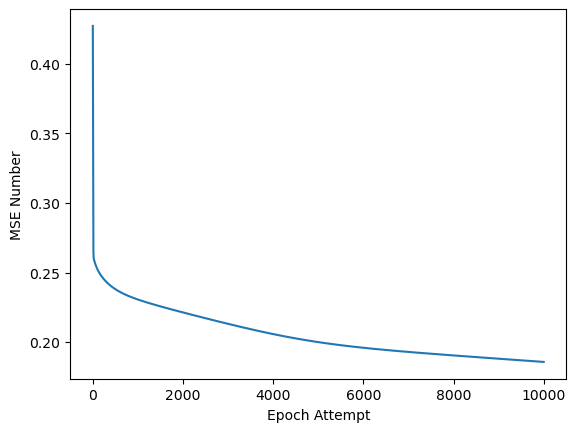

In [9]:
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder(sparse=False)
y_training = encode.fit_transform(y_training.reshape(-1, 1))
y_testing = encode.transform(y_testing.reshape(-1, 1))

n_n = NeuralNetwork(x_training, y_training)
n_n.train()

In [10]:
y_pred = n_n.predict(x_testing)
print("Shape of y_pred:", y_pred.shape)
print("Shape of y_test:", y_testing.shape)
y_testing = np.argmax(y_testing, axis=1)

Shape of y_pred: (231,)
Shape of y_test: (231, 2)


In [11]:
from sklearn.metrics import confusion_matrix, mean_squared_error

mse = mean_squared_error(y_testing, y_pred)
cm = confusion_matrix(y_testing, y_pred)
tp, fn, fp, tn = cm.ravel()

fp_rate = fp / (fp + tn)
tp_rate = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)


In [12]:
sensitivity = tp / float(fn + tp)
precision = tp / float(tp + fp)
F1_score = 2*((precision*sensitivity)/(precision+sensitivity))

In [13]:
print ("MSE:", mse)
print('Confusion Matrix:', cm)
print('FP Rate:', fp_rate)
print('TP Rate:', tp_rate)
print('Accuracy:', accuracy)
print("F1 Score:", F1_score)

MSE: 0.26406926406926406
Confusion Matrix: [[79 30]
 [31 91]]
FP Rate: 0.2540983606557377
TP Rate: 0.7247706422018348
Accuracy: 0.7359307359307359
F1 Score: 0.7214611872146118
